# INTRODUCTION


This case study is in the Capstone Project of Google Data Analytic Certificate. In this notebook, I will go through 6 steps of Data Analysis which is Ask, Prepare, Process, Analyse, Share and Act.

Title: Bellabeat Case Study

Author: Tri Hai

Date: 12/04/2023

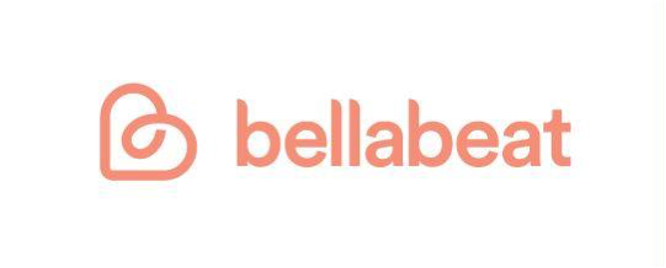

# Bellabeat: How Can A Wellness Technology Company Play It Smart?

## PHASE 1: ASK

**1.1 Background**

Bellabeat is a high-tech manufacturer of health-focused products for women. The cofounder and Chief Creative Officer of Bellabeat wants to analyse fitness data to unlock new growth oppotunities.

**1.2 Business Tasks**

1. Insight on how customer using their smart devices
2. Select one Bellabeat product to apply these insights

**Key questions:**
1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help inﬂuence Bellabeat marketing strategy

**1.3 Deliverables**

1. A clear summary of the business task 
2. A description of all data sources used 
3. Documentation of any cleaning or manipulation of data 
4. A summary of analysis 
5. Supporting visualizations and key ﬁndings 
6. Top high-level content recommendations based on your analysis 

**1.4 Indentify key stakeholders**

1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Oﬃcer 
2. Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team 
3. Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## PHASE 2: PREPARE

**2.1 General information about the dataset**

1. This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. 

2. The dataset include 18 csv files about physical activity, heart rate, sleep monitoring of smart device's user

### Import libraries & data

In [2]:
# Import Lybaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data
# dailyActivity_merged have data of dailyCalories_merged, dailyIntensities_merged, dailySteps_merged
daily_activity = pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/dailyActivity_merged.csv')
daily_sleep = pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/sleepDay_merged.csv')
daily_calories = pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/dailyCalories_merged.csv')
daily_intensities =  pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/dailyIntensities_merged.csv')
daily_steps =  pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/dailySteps_merged.csv')

# Hourly
hourly_calories = pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/hourlyIntensities_merged.csv')
hourly_steps = pd.read_csv('C:/Users/win10pro/Downloads/case2_data/Finbasedata/hourlySteps_merged.csv')



**Inspect these files**

In [ ]:
daily_activity.head()

In [ ]:
daily_sleep.head()

In [12]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [16]:
daily_intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [9]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


* The data on daily_activity file include data from dailyCalories_merged, dailyIntensities_merged, dailySteps_merged. let's check whether the informations is combined correctly.

In [7]:
# First let's check the total numbers of rows

print(f'daily_activity length: {len(daily_activity)}')
print(f'daily_calories length: {len(daily_calories)}')
print(f'daily_intensities length: {len(daily_intensities)}')
print(f'daily_steps length: {len(daily_steps)}')

daily_activity length: 940
daily_calories length: 940
daily_intensities length: 940
daily_steps length: 940


In [3]:
# We'll use this code to see whether the records in daily_calories are differ from daily_activity table
pd.concat([daily_activity, pd.concat([daily_calories]*2)]).drop_duplicates(['Calories'], keep=False)
                  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay


* Great!, this mean all the record of calories column from daily_calories match perfectly with the daily activity, so we'll do the same with other 2 table

In [4]:
pd.concat([daily_activity, pd.concat([daily_steps]*2)]).drop_duplicates(['StepTotal'], keep=False)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,StepTotal


In [5]:
pd.concat([daily_activity, pd.concat([daily_intensities]*2)]).drop_duplicates(['VeryActiveDistance', 
                  'ModeratelyActiveDistance', 
                  'LightActiveDistance', 
                  'SedentaryActiveDistance', 
                  'VeryActiveMinutes',
                  'FairlyActiveMinutes', 
                  'LightlyActiveMinutes', 
                  'SedentaryMinutes'], keep=False)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay


*Great, its seem that all the fields in daily_activities is gather correctly from other tables.

**Note**
* I didn't use minute data because it is summarized in hourly data
* I also excluded the data about weight and heartrate due to lack of observations (8/31 user)

## PHASE 3: PROCESS
### Clean, Merge, Transformation data

In [32]:
print(daily_activity.dtypes)

# After discovering these files, I noticed that date and hour is not format correctly

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


In [6]:
# Standardise DateTime Formate
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'])
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

# Merge Data
daily_df = pd.merge(daily_activity, daily_sleep, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])
hourly_df = pd.merge(hourly_calories, hourly_intensities,  how='outer', on=['Id', 'ActivityHour'])
hourly_df = pd.merge(hourly_df, hourly_steps, how='outer', on=['Id', 'ActivityHour'])

# Remove Duplicates
daily_df = daily_df.drop_duplicates(keep='first')
hourly_df = hourly_df.drop_duplicates(keep='first')

# Remove rows that have TotalDistance = 0, assuming that FitBit was not wore on that day
daily_df = daily_df.drop(daily_df[(daily_df['TotalDistance'] == 0)].index)

In [21]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaT,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0


In [28]:
daily_df[daily_df['Calories']== 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [22]:
hourly_df.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0


## PHASE 4 & 5: ANALYSE & SHAERE

### Preliminaary Analysis

In [7]:
daily_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,8.620000e+02,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,410.000000,410.000000,410.000000
mean,4.861037e+09,8329.039443,5.986450,5.970800,0.117959,1.638654,0.618898,3.643121,0.001752,23.041763,14.792343,210.258701,955.192575,2362.470998,1.119512,419.173171,458.482927
std,2.417627e+09,4739.246947,3.717616,3.699756,0.646473,2.736308,0.905329,1.854434,0.007655,33.656502,20.433053,96.574833,279.971556,702.269583,0.346636,118.635918,127.455140
min,1.503960e+09,8.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.000000,58.000000,61.000000
25%,2.320127e+09,4926.750000,3.372500,3.372500,0.000000,0.000000,0.000000,2.350000,0.000000,0.000000,0.000000,147.000000,721.250000,1856.750000,1.000000,361.000000,403.750000
50%,4.445115e+09,8053.500000,5.590000,5.590000,0.000000,0.410000,0.310000,3.580000,0.000000,7.000000,8.000000,208.500000,1020.500000,2220.500000,1.000000,432.500000,463.000000
75%,6.962181e+09,11096.250000,7.905000,7.880000,0.000000,2.277500,0.867500,4.897500,0.000000,35.000000,21.000000,272.000000,1189.000000,2832.000000,1.000000,490.000000,526.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000


In [41]:
hourly_df.describe()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000


**Analysis**

1. The average steps of user is 8329 which is a bit low according to recommendaion steps per day for healthy condition (10000) (1)
2. Average calories is 2362 per day which is in the middle of burn calories for male (2,200–3,000) and female (1600 - 2200) (2)
3. Average sleep time is 7 hours about 39 minutes inaddition was taken in bed


### Correlations and Trends

In [8]:
corr = daily_df[['TotalSteps','Calories', 'SedentaryMinutes', 'TotalTimeInBed', 'TotalMinutesAsleep']].corr()
round(corr,2)

,TotalSteps,Calories,SedentaryMinutes,TotalTimeInBed,TotalMinutesAsleep
TotalSteps,1.00,0.56,-0.19,-0.17,-0.19
Calories,0.56,1.00,-0.03,-0.13,-0.03
SedentaryMinutes,-0.19,-0.03,1.00,-0.62,-0.60
TotalTimeInBed,-0.17,-0.13,-0.62,1.00,0.93
TotalMinutesAsleep,-0.19,-0.03,-0.60,0.93,1.00


**Comments:**
1. correlated pairs: 
* positive: minutes as sleep and time in bed (strong), calories and steps
* negative: sedentary minutes and time in bed 
=> we'll discover these pair using plot.
* no correlation: sleep time & calories, sedentary time & calories

#### Sedentary time Vs Sleep time

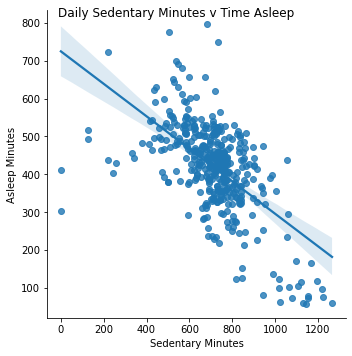

In [9]:
daily_sedentary_bed_time = sns.lmplot(x='SedentaryMinutes', y='TotalMinutesAsleep', data=daily_df)
daily_sedentary_bed_time.fig.suptitle('Daily Sedentary Minutes v Time Asleep')
daily_sedentary_bed_time.set_axis_labels('Sedentary Minutes', 'Asleep Minutes')

#### Steps Vs Calories

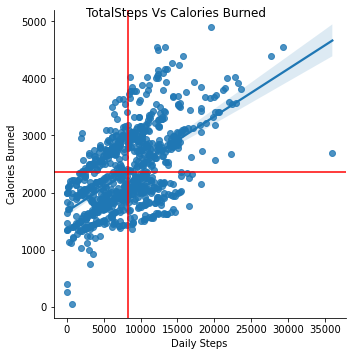

In [10]:
daily_step_calories = sns.lmplot(x='TotalSteps', y='Calories', data=daily_df)
daily_step_calories.fig.suptitle('TotalSteps Vs Calories Burned')
daily_step_calories.set_axis_labels('Daily Steps', 'Calories Burned')
_ = plt.axvline(x=daily_df.TotalSteps.mean(), color='red')
_ = plt.axhline(y=daily_df.Calories.mean(), color='red')

**Comments:**
1. Number of steps distribute mostly between 0 - 18000

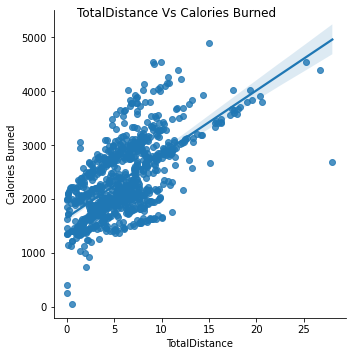

In [11]:
daily_distance_calories = sns.lmplot(x='TotalDistance', y='Calories', data=daily_df)
daily_distance_calories.fig.suptitle('TotalDistance Vs Calories Burned')
daily_distance_calories.set_axis_labels('TotalDistance', 'Calories Burned')

### Trends in week

In [12]:
daily_df["Weekday"] = daily_df["ActivityDate"].dt.day_name()
hourly_df["HourOfDay"] = hourly_df["ActivityHour"].dt.hour

In [13]:
daily_df["Weekday"].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Weekday, dtype: object

#### Log frequency by weekday

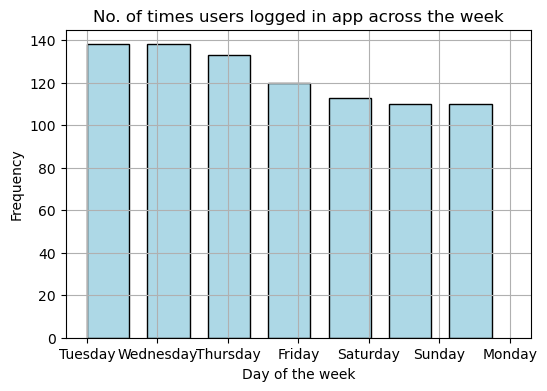

In [14]:
# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(daily_df.Weekday, bins = 7, 
         width = 0.6, color = "lightblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

* The Log frequency drops relatively during weekend  and monday. Highest in the middle of the week which is reasonable because user may forget to wear or they may go out at that time.

#### Steps per weekday

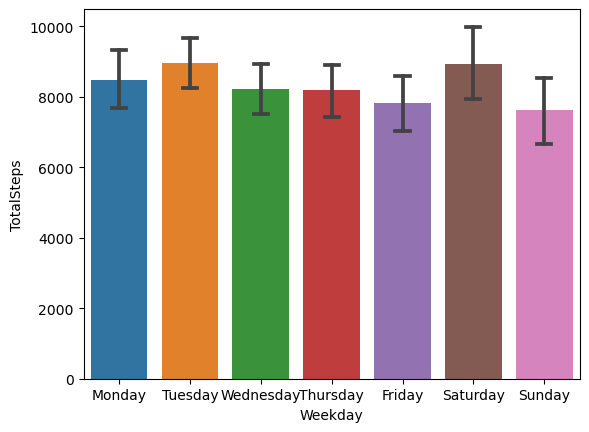

In [15]:
activity_by_week_day = sns.barplot(x="Weekday", y="TotalSteps", data=daily_df, 
                                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                   capsize=.2)

*These is not a clear difference in steps between weekday

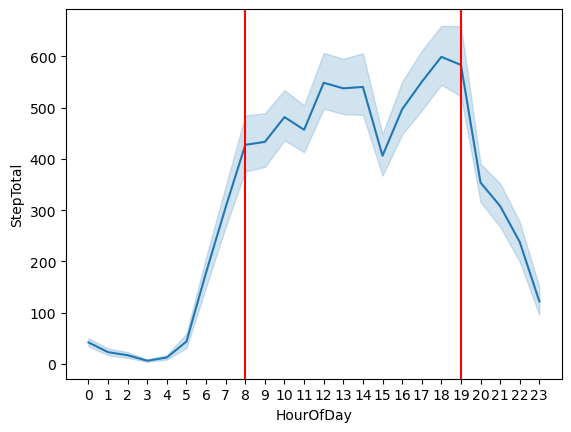

In [18]:
Steps_per_hour = sns.lineplot(x='HourOfDay', y='StepTotal', data=hourly_df)
_ = plt.xticks(hourly_df['HourOfDay'].unique())
_ = plt.axvline(x=8, color='red')
_ = plt.axvline(x=19, color='red')


* People are most active during 12-14h and 18-19h and the large proportion of steps were taken between 8am - 7pm

### Trends in term of users

In [33]:
# Let group the information of sedentary by id
avg_sedentary = daily_df.copy().groupby('Id').mean()

# order by Sedentary Minutes, in descending oder
avg_sedentary = avg_sedentary.sort_values(by=['SedentaryMinutes'], ascending = False)

# reset index
avg_sedentary = avg_sedentary.reset_index()

# include only Id and SedentaryMinutes columns in df
avg_sedentary = avg_sedentary[['Id', 'SedentaryMinutes', ]]

avg_sedentary.head()

,Id,SedentaryMinutes
0,8253242879,1278.888889
1,8583815059,1261.466667
2,1624580081,1257.741935
3,1927972279,1244.352941
4,6775888955,1225.000000


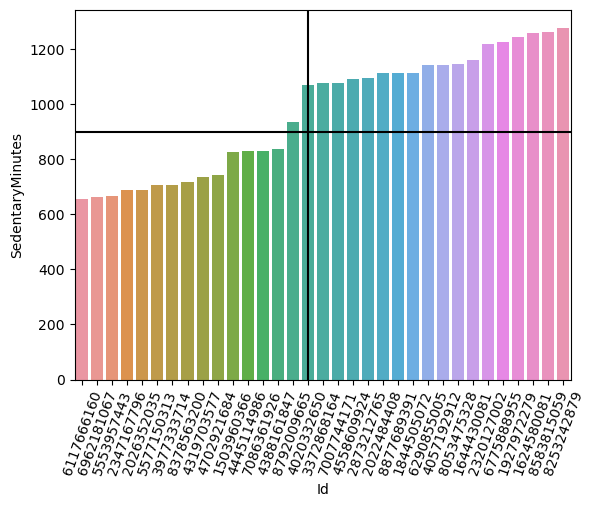

In [38]:
# Let's spot the data on bar graph

sns.barplot(data = avg_sedentary,
            x = 'Id', y = 'SedentaryMinutes',
            order = avg_sedentary.sort_values('SedentaryMinutes',ascending = True)['Id'])
plt.xticks(rotation=70)
_ = plt.axvline(x=15, color='black')
_ = plt.axhline(y=900, color='black');

* We can see a clear difference between two group that has sedentary time less than 900min and more than 900min, so we'll check the steps per user and then decise whether we can devide users into 2 group which is less active and more active.

In [34]:
# Let group the information of steps by id
avg_steps = daily_df.copy().groupby('Id').mean()

# order by Steps, in descending oder
avg_steps = avg_steps.sort_values(by=['TotalSteps'], ascending = False)

# reset index
avg_steps = avg_steps.reset_index()

# include only Id and Steps columns in df
avg_steps = avg_steps[['Id', 'TotalSteps', ]]

avg_steps.head()

,Id,TotalSteps
0,8877689391,16040.032258
1,8053475328,14763.290323
2,1503960366,12520.633333
3,7007744171,12267.041667
4,2022484408,11370.645161


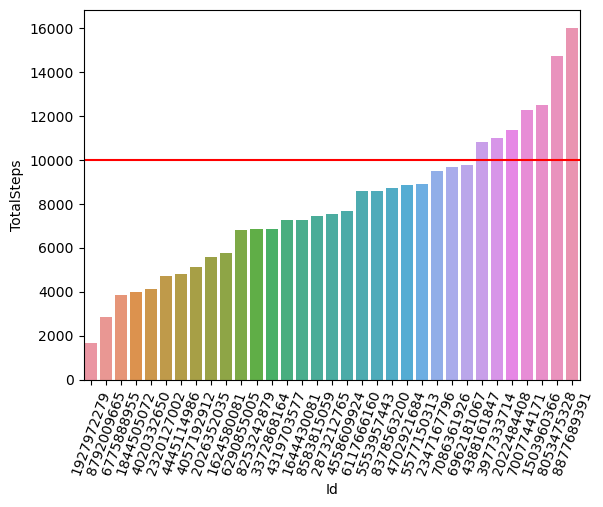

In [32]:
sns.barplot(data = avg_steps,
            x = 'Id', y = 'TotalSteps',
            order = avg_steps.sort_values('TotalSteps',ascending = True)['Id'])
plt.xticks(rotation=70)
_ = plt.axhline(y=10000, color='red');



* It not very clearly but we can see from two bar graphs that a large propotion of user is not very active compare to another group. And most users is below the 10000 steps. So we should focus on either two group of the customers ( not just on sport activity) and encourage they to work out more .

## PHASE 6: ACT

1. There's a positive relation between sleep time and time for sedentary activity. The more you in a sedentary state, the less time you sleep. So to improve the quality of sleep, we can send a notification to do light exercise when user in sedentary state.

2. There's also a positive relation between steps per day and calories burn, we can implement the model that calculate how many steps you need to burn x calories and also encourage user to walk more to reach a 10000 steps recommendation. 

3. It's seem that more steps were taken during 13-15 and 18-19 period so Bellabeat can send a workout notification at that time. in addition, users also forget to log in during the weekend so Bella can also send notification in that period.

4. The marketing campaigh should not only focus on active user but also on more leisure-oriented user and encourage them to workout more.

5. **Conclusions:** We should develop software that allows users to track their steps in real-time. Some gamification (achievements, motivational messages per steps taken, etc.) could also be implemented to promote more step-taking! Sleep tracking should also help our users take better care of their health by adopting healthier habits while awake!


## Limitations and Further analysis

1. The sample size is small, only 32 user

2. We can not use the data about weight due to the lack of records ( only 8 users have weight data). While this data is helpful in devide users into healthy, obese or overweight group

3. This dataset include data about male and female while Bella is design for female user.

* This is the end of my analysis, thank you for reading and please reach out to me if you have any recommendations. I also want to thanks the python community on Github and Kaggle for giving me very helpful insights about some of the codes and analysis. 

## APENDIX

Referrences:
1. https://firstquotehealth.com/health-insurance/news/recommended-steps-day
2. https://www.healthline.com/health/fitness-exercise/how-many-calories-do-i-burn-a-day#_noHeaderPrefixedContent

Dataset: https://www.kaggle.com/datasets/arashnic/fitbit
